# 匯入套件

In [1]:
#essentials
import pandas as pd
import numpy as np
import datetime
import random
#Plots
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#regular expression
import re 

In [2]:
df = pd.read_csv('D:\\資策會期末專題資料\\房地產\\政府資料_雙北房地產\\原始資料\\housing.csv',skiprows=1)
# df = pd.read_csv('C:/Users/student/Desktop/housing.csv',skiprows=1)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,total floor number,building state,main use,main building materials,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number
0,文山區,房地(土地+建物)+車位,台北市文山區興隆路四段145巷1~30號,16.40,住,NaN,NaN,1011012,土地1建物1車位1,七層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,891122,92.71,2,2,1,有,有,13550000,146147.0,坡道機械,17.45,0,NaN,RPQNMLMJJIHFFAA98CA
1,文山區,房地(土地+建物),台北市文山區指南路三段22巷8弄1~30號,52.66,住,NaN,NaN,1011009,土地1建物1車位0,六層，電梯樓梯間,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,861213,163.87,4,2,2,有,有,17700000,108010.0,NaN,0.00,0,1.價格含增建2.其中一衛為0.5衛浴,RPSNMLMJJIHFFAA56CA
2,文山區,土地,興隆段四小段241~270地號,1.04,其他,NaN,NaN,1011026,土地3建物0車位0,NaN,NaN,其他,NaN,NaN,NaN,0.00,0,0,0,有,無,100397,96166.0,NaN,0.00,0,NaN,RPQQMLMJJIHFFAA66CA
3,文山區,房地(土地+建物),台北市文山區文山區木新路三段50巷7弄1~30號,23.67,住,NaN,NaN,1011011,土地1建物1車位0,一層，平台,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,NaN,55.80,2,2,1,有,有,9900000,177419.0,NaN,0.00,0,NaN,RPQNMLNJJIHFFAA09CA
4,文山區,土地,興泰段二小段121~150地號,53.00,其他,NaN,NaN,1011019,土地1建物0車位0,NaN,NaN,其他,NaN,NaN,NaN,0.00,0,0,0,有,無,4160500,78500.0,NaN,0.00,0,管理機關:臺北市政府工務局公園路燈工程管理處.協議價購,RPXNMLRJJIHFFAA57CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629081,新店區,房地(土地+建物)+車位,斯馨段31~60地號,19.70,住,NaN,NaN,1081107,土地1建物1車位1,十七層,22,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,NaN,123.75,2,2,2,有,無,17340000,164737.0,坡道平面,33.06,2400000,NaN,RPPTMLQJNHPFFCF56CB
629082,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,NaN,NaN,1081020,土地1建物1車位1,五層,22,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,NaN,89.31,2,2,1,有,無,11500000,161778.0,坡道平面,33.06,2400000,NaN,RPQTMLQJNHPFFCF66CB
629083,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,NaN,NaN,1090106,土地1建物1車位1,三層,22,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,NaN,89.31,2,2,1,有,無,11520000,162133.0,坡道平面,33.06,2400000,NaN,RPRTMLQJNHPFFCF76CB
629084,新店區,房地(土地+建物)+車位,斯馨段31~60地號,19.70,住,NaN,NaN,1080628,土地1建物1車位1,九層,22,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,NaN,123.75,2,2,2,有,無,16310000,154482.0,坡道平面,33.06,2300000,NaN,RPTTMLQJNHPFFCF96CB


In [3]:
df.rename(columns={'The villages and towns urban district':'district','land shifting total area square meter':'total land area','the use zoning or compiles and checks':' use zoning','main building materials':'main materials','building shifting total area':'total building area','Building present situation pattern - room':'pattern - room','building present situation pattern - hall':'pattern - hall','building present situation pattern - health':'pattern - health','building present situation pattern - compartmented':'pattern - compartmented','Whether there is manages the organization':'Ma organization','new_shifting level':'shifting level'},inplace=True)

In [5]:
df.rename(columns={'total price NTD':'total price','the unit price (NTD / square meter)':'the unit price','the berth total price NTD':'berth price','land sector position building sector house number plate':'addr','the non-metropolis land use district':'non-metropolis','berth shifting total area square meter':'berth shifting area'},inplace=True)

In [6]:
df.iloc[0]

district                                               文山區
transaction sign                              房地(土地+建物)+車位
addr                                  台北市文山區興隆路四段145巷1~30號
total land area                                       16.4
 use zoning                                              住
non-metropolis                                         NaN
non-metropolis land use                                NaN
transaction year month and day                     1011012
transaction pen number                           土地1建物1車位1
shifting level                                          七層
total floor number                                     十四層
building state                             住宅大樓(11層含以上有電梯)
main use                                               住家用
main materials                                      鋼筋混凝土造
construction to complete the years                  891122
total building area                                  92.71
pattern - room                                          

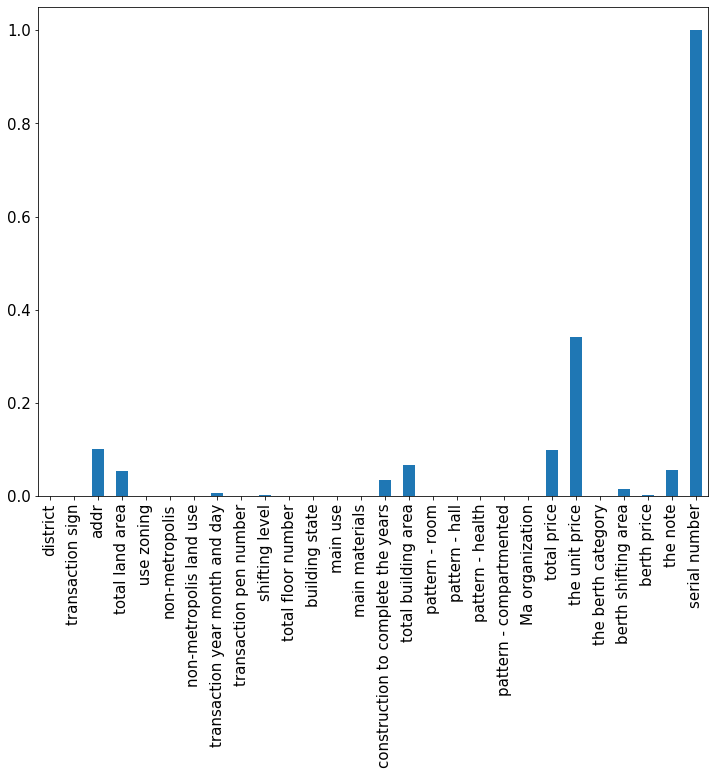

In [7]:
(df.apply(lambda x:x.unique().shape[0],axis=0)/df.shape[0]).plot(kind='bar',rot=90,figsize=(12, 9),fontsize=15)

* 上圖中，若欄位所對應的y值小，則代表該欄位的值有高度重複的現象。也就是說，該欄位可能為類別型變數。而若y值=1,則代表該欄位無重複值，有可能為索引或是連續型變數。

In [9]:
#檢查原始資料空值

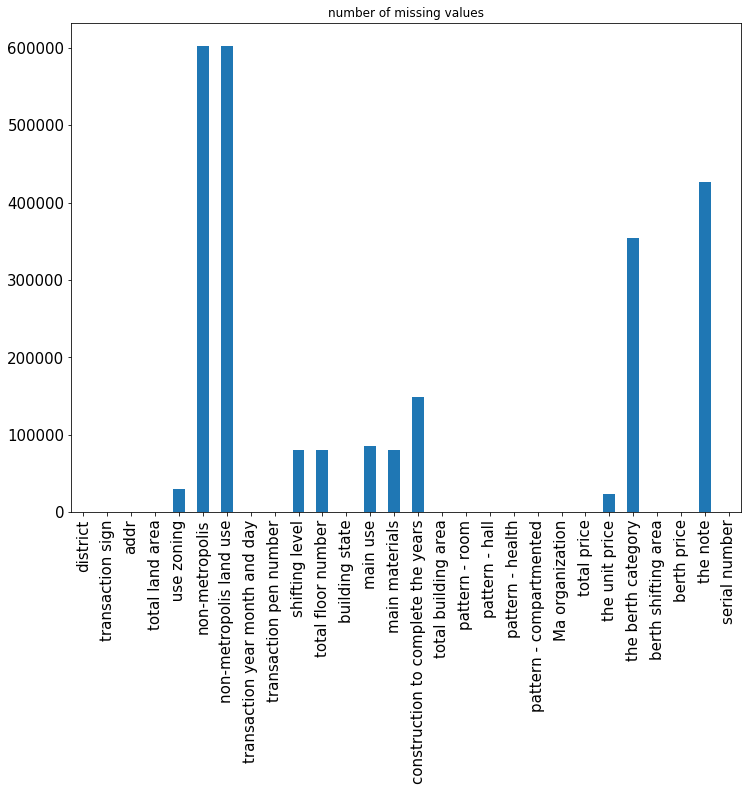

In [10]:
#用內建的pd.DataFrame.plot繪製長條圖
df.isnull().sum().plot(kind='bar',rot=90,title='number of missing values',figsize=(12, 9),fontsize=15)

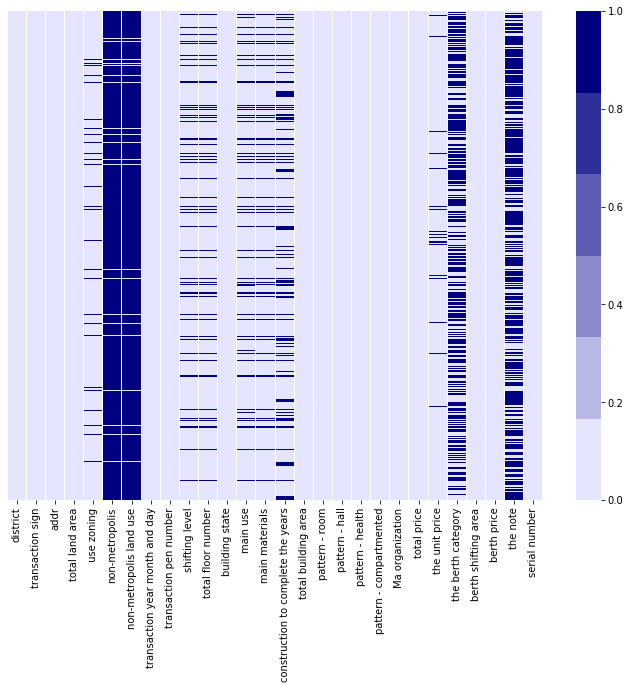

In [11]:
#原始資料空值熱力圖sns.heatmap
cmap=sns.light_palette("navy", reverse=False)
ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df.isnull().astype(int),yticklabels=False,cmap=cmap)

In [34]:
len(df['the berth total price NTD']==0)

629086

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629086 entries, 0 to 629085
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   The villages and towns urban district                    629085 non-null  object 
 1   transaction sign                                         629086 non-null  object 
 2   land sector position building sector house number plate  629084 non-null  object 
 3   land shifting total area square meter                    629086 non-null  float64
 4   the use zoning or compiles and checks                    598968 non-null  object 
 5   the non-metropolis land use district                     27210 non-null   object 
 6   non-metropolis land use                                  27037 non-null   object 
 7   transaction year month and day                           629086 non-null  int64  
 8   transaction pe

# 刪除transaction sign為土地、車位的資料列

In [36]:
mask = df["transaction sign"].isin(["土地","車位"])
taipei = df[-mask]

In [37]:
df.iloc[0]

The villages and towns urban district                                       文山區
transaction sign                                                   房地(土地+建物)+車位
land sector position building sector house number plate    台北市文山區興隆路四段145巷1~30號
land shifting total area square meter                                      16.4
the use zoning or compiles and checks                                         住
the non-metropolis land use district                                        NaN
non-metropolis land use                                                     NaN
transaction year month and day                                          1011012
transaction pen number                                                土地1建物1車位1
shifting level                                                               七層
total floor number                                                          十四層
building state                                                  住宅大樓(11層含以上有電梯)
main use                                

# 刪除transaction sign、the berth category、the note、serial number欄位

In [38]:
taipei = taipei.drop(["transaction sign","the berth category","the note","serial number"],axis=1)

# 拆分transaction pen number欄位

In [39]:
taipei['transaction pen number'] = taipei['transaction pen number'].str.replace('土地',',')
taipei['transaction pen number'] = taipei['transaction pen number'].str.replace('建物',',')
taipei['transaction pen number'] = taipei['transaction pen number'].str.replace('車位',',')

taipei['land'] = taipei['transaction pen number'].str.split(',').str.get(1).astype('int64')
taipei['building'] = taipei['transaction pen number'].str.split(',').str.get(2).astype('int64')
taipei['berth'] = taipei['transaction pen number'].str.split(',').str.get(3).astype('int64')


taipei = taipei.drop(['transaction pen number'],axis=1)

taipei['transaction pen number'] = df['transaction pen number']

taipei[['transaction pen number','land','building','berth']]

# building present situation pattern - compartmented欄位轉換為數值

In [40]:
taipei['building present situation pattern - compartmented'] = taipei['building present situation pattern - compartmented'].replace(['無','有'],[0,1]).astype('int64')

# Whether there is manages the organization欄位轉換為數值

In [41]:
taipei['Whether there is manages the organization'] = taipei['Whether there is manages the organization'].replace(['無','有'],[0,1]).astype('int64')

# transaction year month and day欄位轉換成日期格式

In [42]:
transaction_date = taipei['transaction year month and day'].to_list()

transaction_error = []
for i in transaction_date :
    if len(str(i)) < 6:
#         print(i)
        transaction_error.append(i)
    elif int(str(i)[-4:-2]) < 1 :
        transaction_error.append(i)
# transaction_error

mask2 = taipei['transaction year month and day'].isin(transaction_error)
taipei = taipei[-mask2]
# taipei

taipei["transaction year month and day"] = taipei["transaction year month and day"].astype('int64')+19110000

taipei[['transaction year month and day']] = taipei[['transaction year month and day']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))

taipei['transaction year month and day'] = pd.to_datetime(taipei['transaction year month and day'],format='%Y-%m-%d') 

# 重置index
taipei = taipei.reset_index(drop=True)

# construction to complete the years欄位轉換成日期格式

In [43]:
construction_date = taipei['construction to complete the years'].fillna(0).to_list()

construction_date_list=[]

for j in construction_date:
    a = str(j).split(".")[0]
    num = ''.join([x for x in a if x.isdigit()])
    construction_date_list.append(num) 

taipei["construction to complete the years"] = pd.Series(construction_date_list)


construction_date = taipei['construction to complete the years'].to_list()

construction_error = []
for i in construction_date :
    if len(str(i)) < 6:
        construction_error.append(i)
    elif int(str(i)[-4:-2]) < 1 :
        construction_error.append(i)
    elif str(i)[-4:-2] == '06' :
        if int(str(i)[-2:]) > 30:
            construction_error.append(i)
    elif str(i)[-4:-2] == '02' :
        if int(str(i)[-2:]) > 29:
            construction_error.append(i)
            

mask3 = taipei['construction to complete the years'].isin(construction_error)
taipei = taipei[-mask3]
# taipei

taipei["construction to complete the years"] = taipei["construction to complete the years"].astype('int64')+19110000

taipei[['construction to complete the years']] = taipei[['construction to complete the years']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))

taipei['construction to complete the years'] = pd.to_datetime(taipei['construction to complete the years'],format='%Y-%m-%d') 

# 重置index
taipei = taipei.reset_index(drop=True)

In [44]:
taipei

,The villages and towns urban district,land sector position building sector house number plate,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,shifting level,total floor number,building state,main use,main building materials,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price (NTD / square meter),berth shifting total area square meter,the berth total price NTD,land,building,berth
0,文山區,台北市文山區興隆路四段145巷1~30號,16.40,住,NaN,NaN,2012-10-12,七層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,2000-11-22,92.71,2,2,1,1,1,13550000,146147.0,17.45,0,1,1,1
1,文山區,台北市文山區指南路三段22巷8弄1~30號,52.66,住,NaN,NaN,2012-10-09,六層，電梯樓梯間,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,1997-12-13,163.87,4,2,2,1,1,17700000,108010.0,0.00,0,1,1,0
2,文山區,台北市文山區興隆路二段233巷5弄1~30號,14.26,住,NaN,NaN,2012-10-20,八層,九層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,2009-11-18,62.35,2,1,2,1,1,8010000,128478.0,0.00,0,2,1,1
3,文山區,台北市文山區羅斯福路五段218巷38弄1~30號,10.68,住,NaN,NaN,2012-10-01,十一層,十六層,套房(1房1廳1衛),住家用,鋼筋混凝土造,1997-08-15,45.04,1,1,1,1,0,7800000,173162.0,0.00,0,0,1,0
4,文山區,台北市文山區萬盛街121~150號,30.90,住,NaN,NaN,2012-10-08,五層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,2012-07-25,151.22,3,2,2,1,1,22860000,151253.0,10.00,1500000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,土城區,新北市土城區金城路二段121~150號,10.04,住,NaN,NaN,2017-12-05,四層,十五層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,103.96,2,2,1,1,1,10300000,99077.0,28.41,0,1,1,1
466834,土城區,新北市土城區國際路158巷1~30號,146.31,NaN,鄉村區,乙種建築用地,2020-04-02,全,二層,透天厝,住家用,加強磚造,1980-10-07,109.20,3,2,2,1,0,10750000,98443.0,0.00,0,1,1,0
466835,土城區,新北市土城區金城路二段121~150號,9.78,住,NaN,NaN,2017-12-22,五層,十五層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,101.93,2,2,1,1,1,10030000,98401.0,28.41,0,1,1,1
466836,土城區,新北市土城區金城路二段121~150號,9.93,住,NaN,NaN,2018-03-10,十一層,十五層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,105.53,2,2,1,1,1,10600000,100445.0,30.90,0,1,1,1


In [45]:
taipei[['construction to complete the years','transaction year month and day']]

,construction to complete the years,transaction year month and day
0,2000-11-22,2012-10-12
1,1997-12-13,2012-10-09
2,2009-11-18,2012-10-20
3,1997-08-15,2012-10-01
4,2012-07-25,2012-10-08
...,...,...
466833,2020-03-17,2017-12-05
466834,1980-10-07,2020-04-02
466835,2020-03-17,2017-12-22
466836,2020-03-17,2018-03-10


In [46]:
df['construction to complete the years'].isnull().sum()

149112

# 建立屋齡house age欄位

In [47]:
taipei['house age'] = taipei['transaction year month and day'] - taipei['construction to complete the years']

taipei[['transaction year month and day','construction to complete the years','house age']]

,transaction year month and day,construction to complete the years,house age
0,2012-10-12,2000-11-22,4342 days
1,2012-10-09,1997-12-13,5414 days
2,2012-10-20,2009-11-18,1067 days
3,2012-10-01,1997-08-15,5526 days
4,2012-10-08,2012-07-25,75 days
...,...,...,...
466833,2017-12-05,2020-03-17,-833 days
466834,2020-04-02,1980-10-07,14422 days
466835,2017-12-22,2020-03-17,-816 days
466836,2018-03-10,2020-03-17,-738 days


In [87]:
#把屋齡(days)轉換成數值
df['house age'] = df['house age'].astype('str')
df['house age'] = df['house age'].str.replace('days \+?00\:00\:00\.000000000','',regex=True)
df['house age'] = df['house age'].astype('int64')
df

,The villages and towns urban district,land shifting total area square meter,the use zoning or compiles and checks,total floor number,building state,main use,main building materials,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price,land,building,berth,house age
0,文山區,16.40,住,14,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,92.71,2,2,1,1,1,13550000,483132.7526,1,1,1,4342
1,文山區,52.66,住,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,163.87,4,2,2,1,1,17700000,357059.4580,1,1,0,5414
2,文山區,14.26,住,9,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,62.35,2,1,2,1,1,8010000,424722.5724,2,1,1,1067
3,文山區,10.68,住,16,套房(1房1廳1衛),住家用,鋼筋混凝土造,45.04,1,1,1,1,0,7800000,572438.9396,0,1,0,5526
4,文山區,30.90,住,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,151.22,3,2,2,1,1,22860000,500012.1674,1,1,1,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,土城區,10.04,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,103.96,2,2,1,1,1,10300000,327528.7466,1,1,1,-833
466834,土城區,146.31,NaN,2,透天厝,住家用,加強磚造,109.20,3,2,2,1,0,10750000,325432.8694,1,1,0,14422
466835,土城區,9.78,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,101.93,2,2,1,1,1,10030000,325294.0258,1,1,1,-816
466836,土城區,9.93,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,105.53,2,2,1,1,1,10600000,332051.0810,1,1,1,-738


# 地址_門牌號碼範圍取中間數(e.g. 門牌號碼:1~30 > 15)

In [48]:
addr_list = taipei['land sector position building sector house number plate'].to_list()

n=0 #計次用變數
new_addr_list = [] #用來存放更改過後的地址
for i in addr_list:
    try:
        rang = re.search(r"(\d+~\d+)", i)[1]
        split_rang = rang.split('~')
        number1 = int(split_rang[0])
        number2 = int(split_rang[1])
        even = ((number2-number1)//2)+number1
        new_i = i.replace(f'{rang}',f'{even}')
        new_addr_list.append(new_i)
        n+=1
#         print(n)
#         print(new_i)
    except:                    #有些地址沒有(\d+~\d+)的格式,搜尋不到會出錯,所以用except接
        new_addr_list.append(i)
        n+=1
#         print(n)
#         print(new_i)
# len(new_addr_list) #檢查新list地址數量是否和舊的list數量一致
taipei['new addr'] = pd.Series(new_addr_list)

taipei[['land sector position building sector house number plate','new addr']]

,land sector position building sector house number plate,new addr
0,台北市文山區興隆路四段145巷1~30號,台北市文山區興隆路四段145巷15號
1,台北市文山區指南路三段22巷8弄1~30號,台北市文山區指南路三段22巷8弄15號
2,台北市文山區興隆路二段233巷5弄1~30號,台北市文山區興隆路二段233巷5弄15號
3,台北市文山區羅斯福路五段218巷38弄1~30號,台北市文山區羅斯福路五段218巷38弄15號
4,台北市文山區萬盛街121~150號,台北市文山區萬盛街135號
...,...,...
466833,新北市土城區金城路二段121~150號,新北市土城區金城路二段135號
466834,新北市土城區國際路158巷1~30號,新北市土城區國際路158巷15號
466835,新北市土城區金城路二段121~150號,新北市土城區金城路二段135號
466836,新北市土城區金城路二段121~150號,新北市土城區金城路二段135號


# 總層數欄位數字化(float64)

In [49]:
#取代用變數
num1 = ['一','二','三','四','五','六','七','八','九']
rnum1 = []
for i in range(1,10):
    l = str(i)
    rnum1.append(l)
num2 = ['2十層','3十層','4十層','5十層','6十層','7十層','8十層','9十層']
rnum2 = []
for i in range(2,10):
    l = str(i)+'0層'
    rnum2.append(l)
num3 = ['2十','3十','4十','5十','6十','7十','8十','9十']
rnum3 = []
for i in range(2,10):
    l = str(i)
    rnum3.append(l)

num4 = '十層'
rnum4 = '10層'    
    
num5 = '十'
rnum5 = '1'

num6 = '地下層'
rnum6 = '-1層'

num7 = '地下'
rnum7 = '-'

num8 = '層'
rnum8 = ''

In [50]:
#帶入變數做置換
taipei['total floor number'] = taipei['total floor number'].replace(num1,rnum1,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num2,rnum2,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num3,rnum3,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num4,rnum4,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num5,rnum5,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num6,rnum6,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num7,rnum7,regex=True)
taipei['total floor number'] = taipei['total floor number'].replace(num8,rnum8,regex=True)

In [51]:
#轉換成float64
taipei['total floor number'] = taipei['total floor number'].astype('float')

In [52]:
#最終確認
taipei['total floor number'] = taipei['total floor number'].fillna(0).astype('int64')

# 建立和原始資料分開的資料(testdf)

In [82]:
#刪除不需要的欄位
li = ['land sector position building sector house number plate','the non-metropolis land use district','non-metropolis land use','transaction year month and day','shifting level','construction to complete the years','construction to complete the years','the berth total price NTD','berth shifting total area square meter','new addr']
lim = ['land sector position building sector house number plate','the non-metropolis land use district','non-metropolis land use','shifting level','construction to complete the years','construction to complete the years','the berth total price NTD','berth shifting total area square meter','new addr']
testdf = taipei.drop(li,axis=1)
testv = taipei.drop(lim,axis=1)

In [83]:
#重新命名單位價格平方公尺欄位名稱
testdf.rename(columns={'the unit price (NTD / square meter)':'the unit price'},inplace=True)

In [84]:
#把單位價格平方公尺乘上3.3058轉換成每坪單位價格
testdf['the unit price'] = testdf['the unit price']*3.3058

# 取代所有NA值(testdf)

In [88]:
testdf.isnull().sum()

The villages and towns urban district                     0
land shifting total area square meter                     0
the use zoning or compiles and checks                 15823
total floor number                                        0
building state                                            0
main use                                                886
main building materials                                  15
building shifting total area                              0
Building present situation pattern - room                 0
building present situation pattern - hall                 0
building present situation pattern - health               0
building present situation pattern - compartmented        0
Whether there is manages the organization                 0
total price NTD                                           0
the unit price                                         1393
land                                                      0
building                                

In [103]:
testdf.iloc[360416]

The villages and towns urban district                       五股區
land shifting total area square meter                   2401.97
the use zoning or compiles and checks                       NaN
total floor number                                            2
building state                                               工廠
main use                                                見其他登記事項
main building materials                                      鋼造
building shifting total area                             603.68
Building present situation pattern - room                     0
building present situation pattern - hall                     0
building present situation pattern - health                   0
building present situation pattern - compartmented            0
Whether there is manages the organization                     1
total price NTD                                       508620000
the unit price                                              NaN
land                                    

In [101]:
QQ = list(testdf[testdf['the unit price'].isnull()].index)


In [96]:
import json
f = open("D:\\資策會期末專題資料\\房地產\\政府資料_雙北房地產\\新整理資料\\QQ_unitprice_addr_list.json",'w',encoding='utf-8')
f.write(json.dumps(QQ, ensure_ascii=False))
f.close()

# 空值填補:總價除以總坪數換算單位坪數價格

In [81]:
a = testdf['total price NTD']/testdf['building shifting total area']
testdf['the unit price'] = testdf['the unit price'].fillna(a)

In [60]:
 testdf['main building materials'].unique()

array(['鋼筋混凝土造', '見其他登記事項', '鋼骨鋼筋混凝土造', '加強磚造', '鋼骨混凝土造', '見使用執照',
       '預力混凝土造', '磚造', '壁式預鑄鋼筋混凝土造', nan, '木造', '石造', '鋼造', '鋼筋混凝土加強磚造',
       '土造', '混凝土造', '土石造', '鐵造', '竹造', '土磚石混合造'], dtype=object)

In [61]:
testdf['main building materials'] = testdf['main building materials'].fillna('鋼筋混凝土造')

In [62]:
#由都市使用分區的'住'資料來填補 主要用途欄位的空值

In [63]:
mask1 = testdf['main use'].isnull()
mask2 = testdf['the use zoning or compiles and checks']=='住'
main_index = testdf[mask1 & mask2].index
main_index

Int64Index([   212,    281,    457,    498,   1154,   1169,   1431,   2239,
              2399,   2400,
            ...
            444746, 444787, 444816, 444821, 445224, 452261, 454005, 454700,
            458680, 460903],
           dtype='int64', length=517)

In [64]:
ss = pd.Series('住家用',index=main_index)
ss

212       住家用
281       住家用
457       住家用
498       住家用
1154      住家用
         ... 
452261    住家用
454005    住家用
454700    住家用
458680    住家用
460903    住家用
Length: 517, dtype: object

In [65]:
testdf['main use'] = testdf['main use'].fillna(ss)

In [66]:
testdf['main use'] = testdf['main use'].fillna(0)

In [67]:
print((testdf['main use'] == '住家用').sum())
print((testdf['main use'] == '住商用').sum())
print((testdf['main use'] == '工商用').sum())
print((testdf['main use'] == '住工用').sum())
print((testdf['main use'] == '商業用').sum())

312523
2589
832
223
20829


In [68]:
testdf['the use zoning or compiles and checks'].unique()

array(['住', '商', '其他', '工', nan, '農'], dtype=object)

In [69]:
mask1 = testdf['main use']=='住家用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index1 = testdf[mask1 & mask2].index
print(len(zoning_index1))

mask1 = testdf['main use']=='國民住宅'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index2 = testdf[mask1 & mask2].index
print(len(zoning_index2))

mask1 = testdf['main use']=='商業用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index3 = testdf[mask1 & mask2].index
print(len(zoning_index3))

mask1 = testdf['main use']=='住商用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index4 = testdf[mask1 & mask2].index
print(len(zoning_index4))

mask1 = testdf['main use']=='工商用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index5 = testdf[mask1 & mask2].index
print(len(zoning_index5))

mask1 = testdf['main use']=='住工用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index6 = testdf[mask1 & mask2].index
print(len(zoning_index6))

mask1 = testdf['main use']=='工業用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index7 = testdf[mask1 & mask2].index
print(len(zoning_index7))

mask1 = testdf['main use']=='農舍'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index8 = testdf[mask1 & mask2].index
print(len(zoning_index8))

mask1 = testdf['main use']=='農業用'
mask2 = testdf['the use zoning or compiles and checks'].isnull()
zoning_index9 = testdf[mask1 & mask2].index
print(len(zoning_index9))

12001
23
311
125
11
4
222
97
0


In [70]:
ss1 = pd.Series('住',index=zoning_index1)
ss2 = pd.Series('住',index=zoning_index2)
ss3 = pd.Series('商',index=zoning_index3)
ss4 = pd.Series('住',index=zoning_index4)
ss5 = pd.Series('商',index=zoning_index5)
ss6 = pd.Series('工',index=zoning_index6)
ss7 = pd.Series('工',index=zoning_index7)
ss8 = pd.Series('農',index=zoning_index8)
ss9 = pd.Series('農',index=zoning_index9)

In [71]:
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss1)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss2)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss3)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss4)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss5)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss6)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss7)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss8)
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(ss9)

In [72]:
print((testdf['the use zoning or compiles and checks'] == '住').sum())
print((testdf['the use zoning or compiles and checks'] == '商').sum())
print((testdf['the use zoning or compiles and checks'] == '其他').sum())
print((testdf['the use zoning or compiles and checks'] == '工').sum())
print((testdf['the use zoning or compiles and checks'] == '農').sum())
print((testdf['the use zoning or compiles and checks'].isnull()).sum())

340249
82820
24057
16141
542
3029


In [199]:
testdf

,The villages and towns urban district,land shifting total area square meter,the use zoning or compiles and checks,total floor number,building state,main use,main building materials,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price,land,building,berth,house age
0,文山區,16.40,住,14,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,92.71,2,2,1,1,1,13550000,483132.7526,1,1,1,4342
1,文山區,52.66,住,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,163.87,4,2,2,1,1,17700000,357059.4580,1,1,0,5414
2,文山區,14.26,住,9,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,62.35,2,1,2,1,1,8010000,424722.5724,2,1,1,1067
3,文山區,10.68,住,16,套房(1房1廳1衛),住家用,鋼筋混凝土造,45.04,1,1,1,1,0,7800000,572438.9396,0,1,0,5526
4,文山區,30.90,住,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,151.22,3,2,2,1,1,22860000,500012.1674,1,1,1,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,土城區,10.04,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,103.96,2,2,1,1,1,10300000,327528.7466,1,1,1,-833
466834,土城區,146.31,住,2,透天厝,住家用,加強磚造,109.20,3,2,2,1,0,10750000,325432.8694,1,1,0,14422
466835,土城區,9.78,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,101.93,2,2,1,1,1,10030000,325294.0258,1,1,1,-816
466836,土城區,9.93,住,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,105.53,2,2,1,1,1,10600000,332051.0810,1,1,1,-738


#correlation matrix
corrmat = testdfx.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [29]:
##房價分布

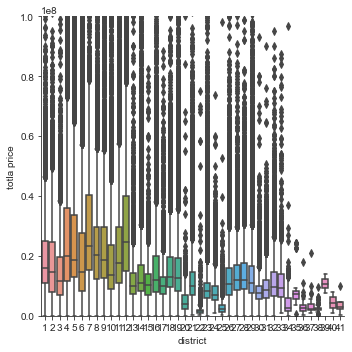

In [117]:
# with sns.axes_style(style='ticks'):
#     g = sns.factorplot("The villages and towns urban district","total price NTD",data=testdfx, kind="box")
#     g.set_axis_labels("district","totla price")
#     g.set(ylim=(0,100000000))

In [1]:
data = pd.concat([testdf['total price NTD'], testdf['The villages and towns urban district']], axis=1)
f, ax = plt.subplots(figsize=(8, 7))
fig = sns.boxplot(x=testdf['The villages and towns urban district'], y="total price NTD", data=data)
fig.axis(ymin=0, ymax=80000000);

NameError: name 'pd' is not defined

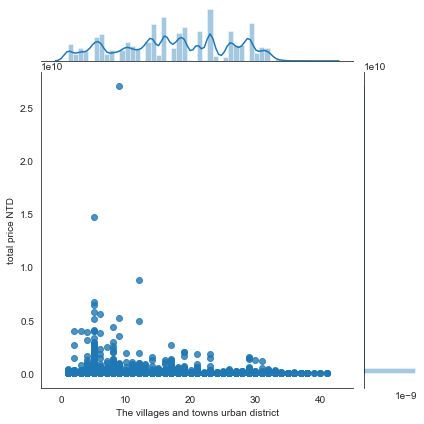

In [132]:
sns.jointplot("The villages and towns urban district","total price NTD",data=testdfx,kind="reg")

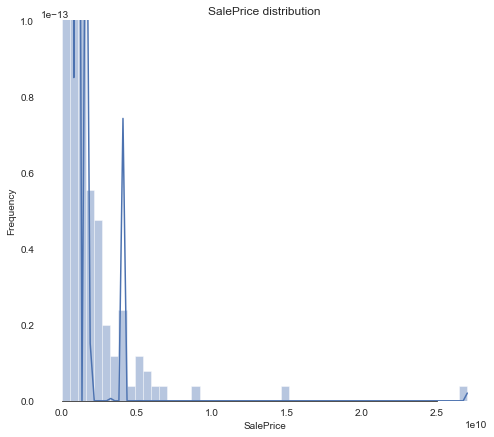

In [130]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(testdfx['total price NTD'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(ylim=(0,0.0000000000001))
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [51]:
#接續testdf

# 建物型態數字化

In [200]:
testdf['building state'] 

0         住宅大樓(11層含以上有電梯)
1           華廈(10層含以下有電梯)
2           華廈(10層含以下有電梯)
3              套房(1房1廳1衛)
4           華廈(10層含以下有電梯)
               ...       
466833    住宅大樓(11層含以上有電梯)
466834                透天厝
466835    住宅大樓(11層含以上有電梯)
466836    住宅大樓(11層含以上有電梯)
466837    住宅大樓(11層含以上有電梯)
Name: building state, Length: 466838, dtype: object

In [201]:
bs = list(testdf['building state'].unique())
bs

['住宅大樓(11層含以上有電梯)',
 '華廈(10層含以下有電梯)',
 '套房(1房1廳1衛)',
 '公寓(5樓含以下無電梯)',
 '辦公商業大樓',
 '廠辦',
 '店面(店鋪)',
 '其他',
 '透天厝',
 '工廠',
 '倉庫',
 '農舍']

In [202]:
# mas1 = testdf['building state']=='其他'
# mas2 = testdf['total floor number'] > 11
# mas3 = testdf['main use']=='住家用'
# bs_index = testdf[mas1 & mas2 & mas3].index
# bs_index

In [203]:
# bss = pd.Series('住宅大樓(11層含以上有電梯)',index=bs_index)
# bss

In [204]:
bname = bs
dgbname = []
for i in range(1,13):
#     x = i
    dgbname.append(i)
dgbname
bname

['住宅大樓(11層含以上有電梯)',
 '華廈(10層含以下有電梯)',
 '套房(1房1廳1衛)',
 '公寓(5樓含以下無電梯)',
 '辦公商業大樓',
 '廠辦',
 '店面(店鋪)',
 '其他',
 '透天厝',
 '工廠',
 '倉庫',
 '農舍']

In [205]:
testdf['building state'] = testdf['building state'].replace(bname,dgbname).astype('int64')
testdf['building state']

0         1
1         2
2         2
3         3
4         2
         ..
466833    1
466834    9
466835    1
466836    1
466837    1
Name: building state, Length: 466838, dtype: int64

# 主要用途數字化(float64)

In [206]:
testdf['main use']

0             住家用
1             住家用
2             住家用
3             住家用
4             住家用
           ...   
466833    見其他登記事項
466834        住家用
466835    見其他登記事項
466836    見其他登記事項
466837    見其他登記事項
Name: main use, Length: 466838, dtype: object

In [207]:
testdf['main use'].unique()

array(['住家用', '商業用', '國民住宅', '見其他登記事項', '見使用執照', 0, '住商用', '農舍', '工業用',
       '停車空間', '工商用', '住工用', '市場攤位', '共有部分', '農業用'], dtype=object)

In [208]:
pname = ['見其他登記事項', '見使用執照', '其他', '共有部份', '共有部分', '住家用','國民住宅', '商業用', '住商用', '工商用', '住工用','工業用', '市場攤位', '農舍', '農業用', '停車空間']
dgpname = [0, 0, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [209]:
testdf['main use'] = testdf['main use'].replace(pname,dgpname)

In [210]:
testdf['main use'].unique().dtype

dtype('int64')

In [211]:
testdf['main use'] = testdf['main use'].fillna(0).astype('int64')

# 都市土地使用分區數值化

In [212]:
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].replace(['住','商','工','農','其他'],[1,2,3,4,0])
testdf['the use zoning or compiles and checks'] = testdf['the use zoning or compiles and checks'].fillna(0).astype('int64')

#都市土地使用分區
0:NA,'其他'
1:'住'
2:'商'
3:'工'
4:'農'

# 主要建材數值化

In [213]:
testdf['main building materials'].unique()

array(['鋼筋混凝土造', '見其他登記事項', '鋼骨鋼筋混凝土造', '加強磚造', '鋼骨混凝土造', '見使用執照',
       '預力混凝土造', '磚造', '壁式預鑄鋼筋混凝土造', '木造', '石造', '鋼造', '鋼筋混凝土加強磚造', '土造',
       '混凝土造', '土石造', '鐵造', '竹造', '土磚石混合造'], dtype=object)

In [214]:
len(testdf['main building materials'].unique())

19

In [215]:
mbm = list(testdf['main building materials'].unique())

In [216]:
mname = mbm
mbmname = []
for i in range(1,20):
#     x = i
    mbmname.append(i)

In [217]:
testdf['main building materials'] = testdf['main building materials'].replace(mname,mbmname).astype('int64')

1:'鋼筋混凝土造'
2:'見其他登記事項'
3:'鋼骨鋼筋混凝土造'
4:'加強磚造'
5:'鋼骨混凝土造'
6:'見使用執照'
7:'預力混凝土造'
8:'磚造'
9:'壁式預鑄鋼筋混凝土造'
10:nan
11:'木造'
12:'石造'
13:'鋼造'
14:'鋼筋混凝土加強磚造'
15:'土造'
16:'土石造'
17:'鐵造'
18:'竹造'
19:'土磚石混合造'

# 鄉鎮市區數值化

In [406]:
testdf['The villages and towns urban district'].unique()

array(['文山區', '大同區', '萬華區', '中正區', '內湖區', '中山區', '南港區', '松山區', '信義區',
       '北投區', '士林區', '大安區', '土城區', '板橋區', '泰山區', '新莊區', '五股區', '林口區',
       '新店區', '金山區', '汐止區', '萬里區', '淡水區', '八里區', '三芝區', '三重區', '蘆洲區',
       '永和區', '中和區', '鶯歌區', '三峽區', '樹林區', '深坑區', '瑞芳區', '石碇區', '石門區',
       '雙溪區', '貢寮區', '坪林區', '平溪區', '烏來區'], dtype=object)

In [79]:
len(taipei['The villages and towns urban district'].unique())

41

In [409]:
ud = list(taipei['The villages and towns urban district'].unique())

In [410]:
dname = ud
udname = []
for i in range(1,42):
#     x = i
    udname.append(i)

In [416]:
#由前面testv DataFrame建立的區域排序清單
sorting_district_list

['貢寮區',
 '石門區',
 '萬里區',
 '雙溪區',
 '三芝區',
 '瑞芳區',
 '金山區',
 '烏來區',
 '石碇區',
 '鶯歌區',
 '平溪區',
 '八里區',
 '三峽區',
 '淡水區',
 '坪林區',
 '樹林區',
 '五股區',
 '深坑區',
 '泰山區',
 '林口區',
 '汐止區',
 '土城區',
 '蘆洲區',
 '新莊區',
 '新店區',
 '三重區',
 '中和區',
 '板橋區',
 '永和區',
 '文山區',
 '萬華區',
 '北投區',
 '大同區',
 '內湖區',
 '南港區',
 '士林區',
 '中山區',
 '松山區',
 '信義區',
 '中正區',
 '大安區']

In [412]:
testdf['The villages and towns urban district'] = testdf['The villages and towns urban district'].replace(sorting_district_list,udname).astype('int64')

In [414]:
#完成區域標記數值化
testdf['The villages and towns urban district'] .unique()

array([30, 33, 31, 40, 34, 37, 35, 38, 39, 32, 36, 41, 22, 28, 19, 24, 17,
       20, 25,  7, 21,  3, 14, 12,  5, 26, 23, 29, 27, 10, 13, 16, 18,  6,
        9,  2,  4,  1, 15, 11,  8], dtype=int64)

區域編號(由價格低到高)
1	貢寮區
2	石門區
3	萬里區
4	雙溪區
5	三芝區
6	瑞芳區
7	金山區
8	烏來區
9	石碇區
10	鶯歌區
11	平溪區
12	八里區
13	三峽區
14	淡水區
15	坪林區
16	樹林區
17	五股區
18	深坑區
19	泰山區
20	林口區
21	汐止區
22	土城區
23	蘆洲區
24	新莊區
25	新店區
26	三重區
27	中和區
28	板橋區
29	永和區
30	文山區
31	萬華區
32	北投區
33	大同區
34	內湖區
35	南港區
36	士林區
37	中山區
38	松山區
39	信義區
40	中正區
41	大安區

# 匯出CSV檔

In [ ]:
testdf.rename(columns={'the unit price (NTD / square meter)':'the unit price'},inplace=True)

In [424]:
testdf['addr']=taipei['new addr']
testdf['shifting level']=taipei['shifting level']
testdf['transaction year month and day']=taipei['transaction year month and day']
testdf['construction to complete the years']=taipei['construction to complete the years']

In [422]:
taipei

,The villages and towns urban district,land sector position building sector house number plate,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,shifting level,total floor number,building state,main use,main building materials,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price (NTD / square meter),berth shifting total area square meter,the berth total price NTD,land,building,berth,house age,new addr
0,文山區,台北市文山區興隆路四段145巷1~30號,16.40,住,NaN,NaN,2012-10-12,七層,14,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,2000-11-22,92.71,2,2,1,1,1,13550000,146147.0,17.45,0,1,1,1,4342 days,台北市文山區興隆路四段145巷15號
1,文山區,台北市文山區指南路三段22巷8弄1~30號,52.66,住,NaN,NaN,2012-10-09,六層，電梯樓梯間,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,1997-12-13,163.87,4,2,2,1,1,17700000,108010.0,0.00,0,1,1,0,5414 days,台北市文山區指南路三段22巷8弄15號
2,文山區,台北市文山區興隆路二段233巷5弄1~30號,14.26,住,NaN,NaN,2012-10-20,八層,9,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,2009-11-18,62.35,2,1,2,1,1,8010000,128478.0,0.00,0,2,1,1,1067 days,台北市文山區興隆路二段233巷5弄15號
3,文山區,台北市文山區羅斯福路五段218巷38弄1~30號,10.68,住,NaN,NaN,2012-10-01,十一層,16,套房(1房1廳1衛),住家用,鋼筋混凝土造,1997-08-15,45.04,1,1,1,1,0,7800000,173162.0,0.00,0,0,1,0,5526 days,台北市文山區羅斯福路五段218巷38弄15號
4,文山區,台北市文山區萬盛街121~150號,30.90,住,NaN,NaN,2012-10-08,五層,7,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,2012-07-25,151.22,3,2,2,1,1,22860000,151253.0,10.00,1500000,1,1,1,75 days,台北市文山區萬盛街135號
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,土城區,新北市土城區金城路二段121~150號,10.04,住,NaN,NaN,2017-12-05,四層,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,103.96,2,2,1,1,1,10300000,99077.0,28.41,0,1,1,1,-833 days,新北市土城區金城路二段135號
466834,土城區,新北市土城區國際路158巷1~30號,146.31,NaN,鄉村區,乙種建築用地,2020-04-02,全,2,透天厝,住家用,加強磚造,1980-10-07,109.20,3,2,2,1,0,10750000,98443.0,0.00,0,1,1,0,14422 days,新北市土城區國際路158巷15號
466835,土城區,新北市土城區金城路二段121~150號,9.78,住,NaN,NaN,2017-12-22,五層,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,101.93,2,2,1,1,1,10030000,98401.0,28.41,0,1,1,1,-816 days,新北市土城區金城路二段135號
466836,土城區,新北市土城區金城路二段121~150號,9.93,住,NaN,NaN,2018-03-10,十一層,15,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,2020-03-17,105.53,2,2,1,1,1,10600000,100445.0,30.90,0,1,1,1,-738 days,新北市土城區金城路二段135號


In [435]:
testdf

,The villages and towns urban district,land shifting total area square meter,the use zoning or compiles and checks,total floor number,building state,main use,main building materials,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price,land,building,berth,house age,addr,shifting level,transaction year month and day,construction to complete the years
0,30,16.40,1,14,1,2,1,92.71,2,2,1,1,1,13550000,483132.7526,1,1,1,4342,台北市文山區興隆路四段145巷15號,七層,2012-10-12,2000-11-22
1,30,52.66,1,7,2,2,1,163.87,4,2,2,1,1,17700000,357059.4580,1,1,0,5414,台北市文山區指南路三段22巷8弄15號,六層，電梯樓梯間,2012-10-09,1997-12-13
2,30,14.26,1,9,2,2,1,62.35,2,1,2,1,1,8010000,424722.5724,2,1,1,1067,台北市文山區興隆路二段233巷5弄15號,八層,2012-10-20,2009-11-18
3,30,10.68,1,16,3,2,1,45.04,1,1,1,1,0,7800000,572438.9396,0,1,0,5526,台北市文山區羅斯福路五段218巷38弄15號,十一層,2012-10-01,1997-08-15
4,30,30.90,1,7,2,2,1,151.22,3,2,2,1,1,22860000,500012.1674,1,1,1,75,台北市文山區萬盛街135號,五層,2012-10-08,2012-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,22,10.04,1,15,1,0,1,103.96,2,2,1,1,1,10300000,327528.7466,1,1,1,-833,新北市土城區金城路二段135號,四層,2017-12-05,2020-03-17
466834,22,146.31,1,2,9,2,4,109.20,3,2,2,1,0,10750000,325432.8694,1,1,0,14422,新北市土城區國際路158巷15號,全,2020-04-02,1980-10-07
466835,22,9.78,1,15,1,0,1,101.93,2,2,1,1,1,10030000,325294.0258,1,1,1,-816,新北市土城區金城路二段135號,五層,2017-12-22,2020-03-17
466836,22,9.93,1,15,1,0,1,105.53,2,2,1,1,1,10600000,332051.0810,1,1,1,-738,新北市土城區金城路二段135號,十一層,2018-03-10,2020-03-17


In [436]:
testdf.to_csv("D:\\資策會期末專題資料\\房地產\\政府資料_雙北房地產\\資料清洗報告\\dual_taipei_clean_testdf_nd.csv",index=False, encoding="utf-8")

In [26]:
dff = pd.read_csv("D:\\資策會期末專題資料\\房地產\\政府資料_雙北房地產\\資料清洗報告\\dual_taipei_clean_testdf_nd.csv")

In [4]:
dff = dff.drop(['shifting level','construction to complete the years'],axis=1)

In [8]:
dff

,The villages and towns urban district,land shifting total area square meter,the use zoning or compiles and checks,total floor number,building state,main use,main building materials,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartmented,Whether there is manages the organization,total price NTD,the unit price,land,building,berth,house age,addr,transaction year month and day
0,30,16.40,1,14,1,2,1,92.71,2,2,1,1,1,13550000,483132.7526,1,1,1,4342,台北市文山區興隆路四段145巷15號,2012-10-12
1,30,52.66,1,7,2,2,1,163.87,4,2,2,1,1,17700000,357059.4580,1,1,0,5414,台北市文山區指南路三段22巷8弄15號,2012-10-09
2,30,14.26,1,9,2,2,1,62.35,2,1,2,1,1,8010000,424722.5724,2,1,1,1067,台北市文山區興隆路二段233巷5弄15號,2012-10-20
3,30,10.68,1,16,3,2,1,45.04,1,1,1,1,0,7800000,572438.9396,0,1,0,5526,台北市文山區羅斯福路五段218巷38弄15號,2012-10-01
4,30,30.90,1,7,2,2,1,151.22,3,2,2,1,1,22860000,500012.1674,1,1,1,75,台北市文山區萬盛街135號,2012-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466833,22,10.04,1,15,1,0,1,103.96,2,2,1,1,1,10300000,327528.7466,1,1,1,-833,新北市土城區金城路二段135號,2017-12-05
466834,22,146.31,1,2,9,2,4,109.20,3,2,2,1,0,10750000,325432.8694,1,1,0,14422,新北市土城區國際路158巷15號,2020-04-02
466835,22,9.78,1,15,1,0,1,101.93,2,2,1,1,1,10030000,325294.0258,1,1,1,-816,新北市土城區金城路二段135號,2017-12-22
466836,22,9.93,1,15,1,0,1,105.53,2,2,1,1,1,10600000,332051.0810,1,1,1,-738,新北市土城區金城路二段135號,2018-03-10


In [10]:
dff[['the unit price','total price NTD']]

,the unit price,total price NTD
0,483132.7526,13550000
1,357059.4580,17700000
2,424722.5724,8010000
3,572438.9396,7800000
4,500012.1674,22860000
...,...,...
466833,327528.7466,10300000
466834,325432.8694,10750000
466835,325294.0258,10030000
466836,332051.0810,10600000


In [149]:
ma = dff.groupby('main building materials')['the unit price'].mean()
ma = ma.reset_index()
ma = ma.sort_values('the unit price',ascending=True,ignore_index=True)
ma

,main building materials,the unit price
0,16,2.489267e+04
1,17,9.246881e+04
2,10,2.288337e+05
3,12,2.378175e+05
4,18,2.396474e+05
5,15,3.059468e+05
6,7,3.829846e+05
7,1,3.880983e+05
8,4,4.147360e+05
9,13,4.253610e+05


[Text(0, 0.5, 'average unit price\n (NTD*3.3058/m^2)')]

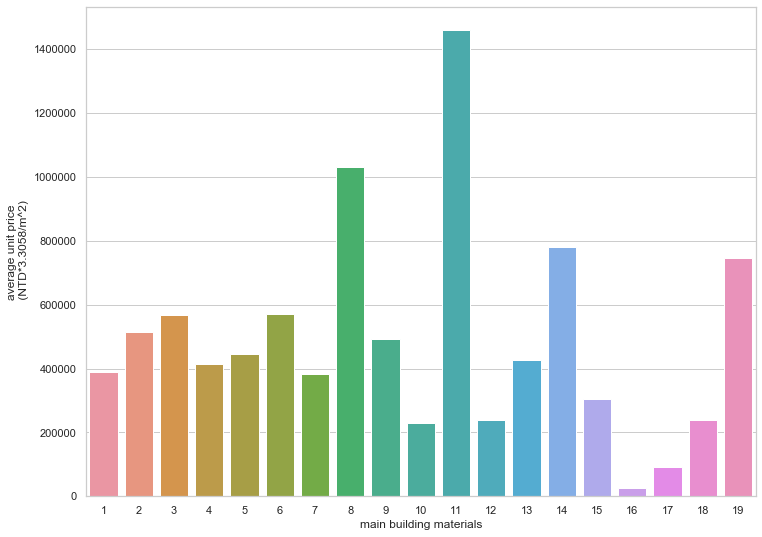

In [150]:
#繪製每個行政區單位平均價格bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 9)) #設定圖片大小
ax = sns.barplot(x="main building materials", y="the unit price", data=ma);
ax.set(ylabel='average unit price\n (NTD*3.3058/m^2)')

In [163]:
dff[dff["main building materials"] == 11]['the unit price'].mean()

(16, 22)

In [165]:
bs = dff.groupby('building state')['the unit price'].mean()
bs = bs.reset_index()
bs = bs.sort_values('the unit price',ascending=True,ignore_index=True)
bs

,building state,the unit price
0,10,98316.307032
1,12,110029.045704
2,11,114543.291224
3,6,309493.969391
4,4,345162.867150
5,1,397769.493713
6,9,403643.688851
7,2,407481.251742
8,8,442583.862836
9,3,504560.419946


[Text(0, 0.5, 'average unit price\n (NTD*3.3058/m^2)')]

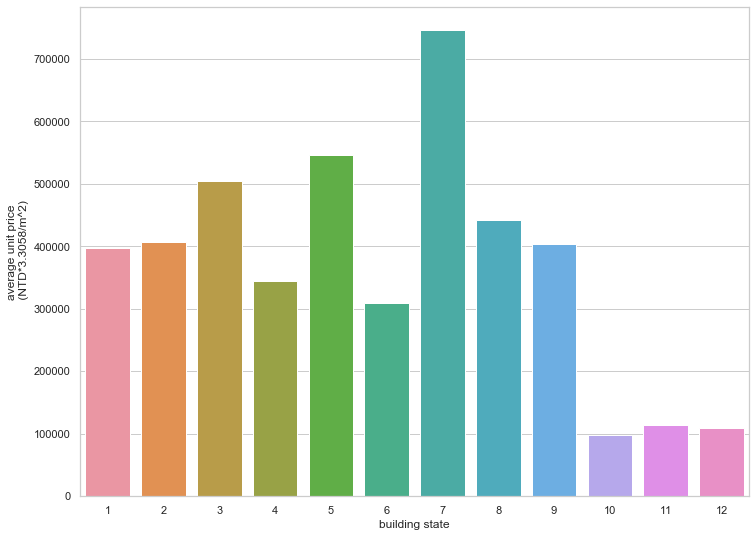

In [166]:
#繪製每個行政區單位平均價格bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 9)) #設定圖片大小
ax = sns.barplot(x="building state", y="the unit price", data=bs);
ax.set(ylabel='average unit price\n (NTD*3.3058/m^2)')

In [152]:
#以.dt.year把DF日期格式的年分隔出來
dff['transaction year month and day'] = pd.to_datetime(dff['transaction year month and day'],format='%Y-%m-%d')

In [153]:
dff['year'] = dff['transaction year month and day'].dt.year

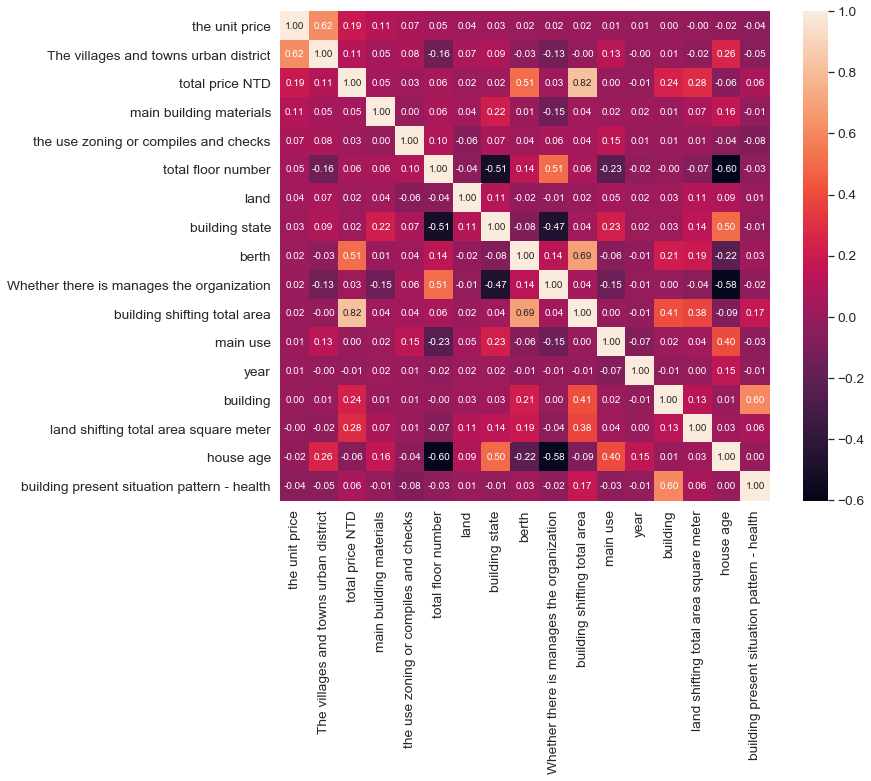

In [154]:
#saleprice correlation matrix
k = 17 #number of variables for heatmap
plt.figure(figsize=(12, 9)) #設定圖片大小
cols = dff.corr().nlargest(k, 'the unit price').index
cm = np.corrcoef(dff[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

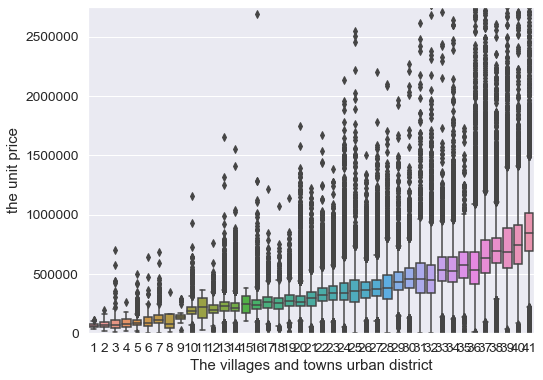

In [155]:
# data = pd.concat([testdf['the unit price (NTD / square meter)'], testdf['district']], axis=1)
mask = dff['year'] >= 2012
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='The villages and towns urban district', y=dff[mask]['the unit price'], data=dff)
fig.axis(ymin=0, ymax=2.748996e+06);

In [1]:
(dfㄑ['year']<2012).sum()

NameError: name 'df' is not defined